In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm



# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Prepare training dataset
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()


# Prepare training dataset

In [3]:
# Make input, output folders
#!mkdir -p input_improved
#!mkdir -p outputs_improved

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)


# Generator & Discriminator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)
    
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')


##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# New Generator and Discriminator (couldn't get to work)

In [5]:
# ngf = 28
# ndf = 28
# nc = 1
# ngpu = 1
# # custom weights initialization called on ``netG`` and ``netD``
# def weights_init(m):
#     classname = m.__class__.__name__
#     if classname.find('Conv') != -1:
#         nn.init.normal_(m.weight.data, 0.0, 0.02)
#     elif classname.find('BatchNorm') != -1:
#         nn.init.normal_(m.weight.data, 1.0, 0.02)
#         nn.init.constant_(m.bias.data, 0)

In [6]:
# # Generator Code
# import torch.nn as nn

# class Generator(nn.Module):
#     def __init__(self, ngpu):
#         super(Generator, self).__init__()
#         self.ngpu = ngpu
#         self.main = nn.Sequential(
#             # input is Z, going into a convolution
#             nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
#             nn.BatchNorm2d(ngf * 8),
#             nn.ReLU(True),
#             # state size. ``(ngf*8) x 4 x 4``
#             nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 1, 1, bias=False),
#             nn.BatchNorm2d(ngf * 4),
#             nn.ReLU(True),
#             # state size. ``(ngf*4) x 7 x 7``
#             nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ngf * 2),
#             nn.ReLU(True),
#             # state size. ``(ngf*2) x 14 x 14``
#             nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ngf),
#             nn.ReLU(True),
#             # state size. ``(ngf) x 28 x 28``
#             nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
#             nn.Tanh()
#             # state size. ``(nc) x 28 x 28``
#         )

#     def forward(self, input):
#         input = input.view(-1, nz, 1, 1)
#         return self.main(input)

    

# class Discriminator(nn.Module):
#     def __init__(self, ngpu):
#         super(Discriminator, self).__init__()
#         self.ngpu = ngpu
#         self.main = nn.Sequential(
#             # input is ``(nc) x 28 x 28``
#             nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. ``(ndf) x 14 x 14``
#             nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 2),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. ``(ndf*2) x 7 x 7``
#             nn.Conv2d(ndf * 2, ndf * 4, 3, 1, 1, bias=False),  # Adjusted kernel size to 3 and stride to 1
#             nn.BatchNorm2d(ndf * 4),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. ``(ndf*4) x 7 x 7``
#             nn.Conv2d(ndf * 4, 1, 7, 1, 0, bias=False),  # Adjusted kernel size to 7 to cover the remaining area
#             nn.Sigmoid()
#         )

#     def forward(self, input):
#         return self.main(input)

    
# # Create the generator
# generator = Generator(ngpu).to(device)

# # Apply the ``weights_init`` function to randomly initialize all weights
# #  to ``mean=0``, ``stdev=0.02``.
# generator.apply(weights_init)

# # Create the Discriminator
# discriminator = Discriminator(ngpu).to(device)
# discriminator.apply(weights_init)

# # Print the models
# print(generator)
# print(discriminator)

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), betas=(0.5, 0.999), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), betas=(0.5, 0.999), lr=0.0002)
#optim_g = optim.Adam(generator.parameters(), lr=0.0002)
#optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

In [8]:
def add_gaussian_noise(images, std=0.1):
    """
    Add Gaussian noise to a batch of images.

    Parameters:
    images (Tensor): A batch of images with shape (batch_size, channels, height, width)
    std (float): Standard deviation of the Gaussian noise

    Returns:
    Tensor: Images with Gaussian noise added
    """
    noise = torch.randn_like(images) * std
    return images + noise

# Training Loop

118it [00:29,  4.04it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


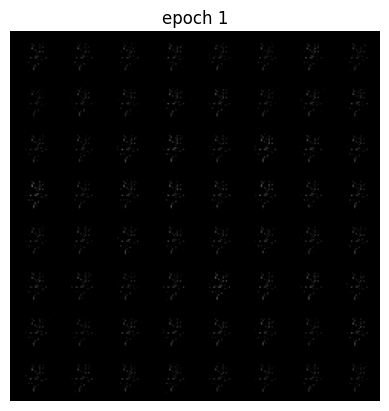

Epoch 1 of 100
Generator loss: 0.85739206, Discriminator loss: 0.59741518


118it [00:30,  3.87it/s]                         


Epoch 2 of 100
Generator loss: 1.50510783, Discriminator loss: 0.38112426


118it [00:31,  3.79it/s]                         


Epoch 3 of 100
Generator loss: 2.62650671, Discriminator loss: 0.35156516


118it [00:32,  3.61it/s]                         


Epoch 4 of 100
Generator loss: 2.81728404, Discriminator loss: 0.34923956


118it [00:32,  3.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


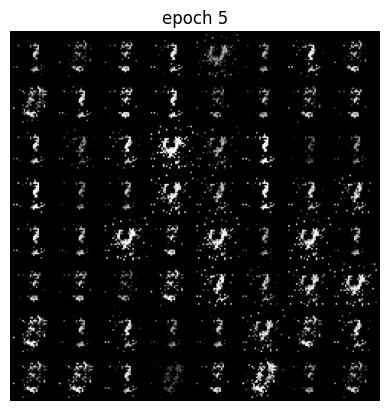

Epoch 5 of 100
Generator loss: 3.15063917, Discriminator loss: 0.31084721


118it [00:33,  3.52it/s]                         


Epoch 6 of 100
Generator loss: 2.99272294, Discriminator loss: 0.36822243


118it [00:33,  3.52it/s]                         


Epoch 7 of 100
Generator loss: 2.94921957, Discriminator loss: 0.33960607


118it [00:36,  3.28it/s]                         


Epoch 8 of 100
Generator loss: 3.20899504, Discriminator loss: 0.29785506


118it [00:34,  3.41it/s]                         


Epoch 9 of 100
Generator loss: 3.03272257, Discriminator loss: 0.32385930


118it [00:33,  3.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


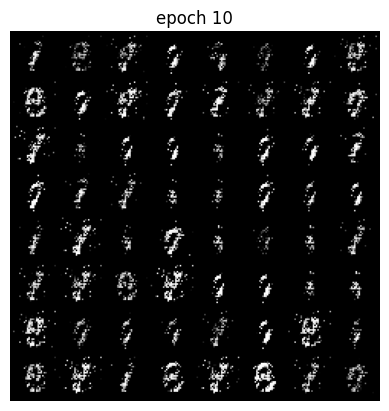

Epoch 10 of 100
Generator loss: 2.78897122, Discriminator loss: 0.32220399


118it [00:34,  3.44it/s]                         


Epoch 11 of 100
Generator loss: 3.24959844, Discriminator loss: 0.25113569


118it [00:34,  3.38it/s]                         


Epoch 12 of 100
Generator loss: 3.24057719, Discriminator loss: 0.26924326


118it [00:32,  3.61it/s]                         


Epoch 13 of 100
Generator loss: 3.18229335, Discriminator loss: 0.25708376


118it [00:33,  3.50it/s]                         


Epoch 14 of 100
Generator loss: 2.76499164, Discriminator loss: 0.33171586


118it [00:31,  3.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


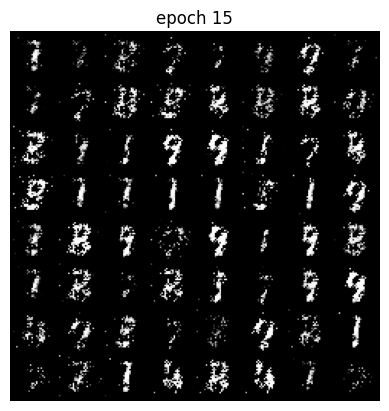

Epoch 15 of 100
Generator loss: 2.72301177, Discriminator loss: 0.30908398


118it [00:30,  3.81it/s]                         


Epoch 16 of 100
Generator loss: 2.78211362, Discriminator loss: 0.25485178


118it [00:34,  3.42it/s]                         


Epoch 17 of 100
Generator loss: 2.80315091, Discriminator loss: 0.26335776


118it [00:33,  3.51it/s]                         


Epoch 18 of 100
Generator loss: 2.78416758, Discriminator loss: 0.24319959


118it [00:34,  3.42it/s]                         


Epoch 19 of 100
Generator loss: 2.86811982, Discriminator loss: 0.22248981


118it [00:35,  3.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


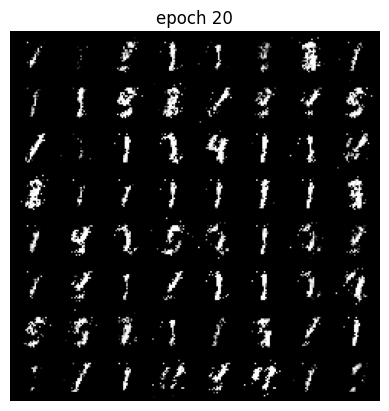

Epoch 20 of 100
Generator loss: 2.58796225, Discriminator loss: 0.24892413


118it [00:34,  3.47it/s]                         


Epoch 21 of 100
Generator loss: 2.46406851, Discriminator loss: 0.26462745


118it [00:31,  3.71it/s]                         


Epoch 22 of 100
Generator loss: 2.31531652, Discriminator loss: 0.30871450


118it [00:30,  3.81it/s]                         


Epoch 23 of 100
Generator loss: 2.40866901, Discriminator loss: 0.30284761


118it [00:30,  3.90it/s]                         


Epoch 24 of 100
Generator loss: 2.36856030, Discriminator loss: 0.28607421


118it [00:32,  3.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


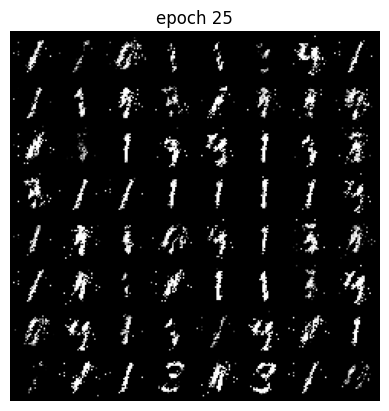

Epoch 25 of 100
Generator loss: 2.45715330, Discriminator loss: 0.28471403


118it [00:32,  3.66it/s]                         


Epoch 26 of 100
Generator loss: 2.40866274, Discriminator loss: 0.29641113


118it [00:30,  3.83it/s]                         


Epoch 27 of 100
Generator loss: 2.27215889, Discriminator loss: 0.31331912


118it [00:30,  3.81it/s]                         


Epoch 28 of 100
Generator loss: 2.17322372, Discriminator loss: 0.32022158


118it [00:31,  3.71it/s]                         


Epoch 29 of 100
Generator loss: 2.32879140, Discriminator loss: 0.29617553


118it [00:31,  3.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


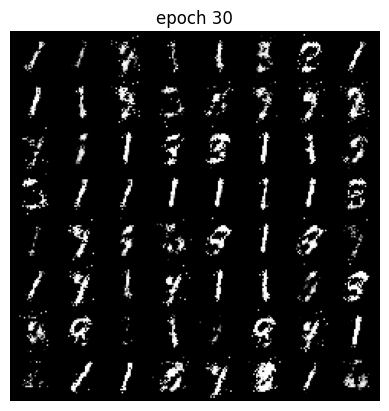

Epoch 30 of 100
Generator loss: 2.15426453, Discriminator loss: 0.33147914


118it [00:31,  3.74it/s]                         


Epoch 31 of 100
Generator loss: 1.99974094, Discriminator loss: 0.35267256


118it [00:31,  3.73it/s]                         


Epoch 32 of 100
Generator loss: 1.98538439, Discriminator loss: 0.35667561


118it [00:31,  3.75it/s]                         


Epoch 33 of 100
Generator loss: 1.81263837, Discriminator loss: 0.38622609


118it [00:31,  3.78it/s]                         


Epoch 34 of 100
Generator loss: 1.76802459, Discriminator loss: 0.39713097


118it [00:31,  3.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


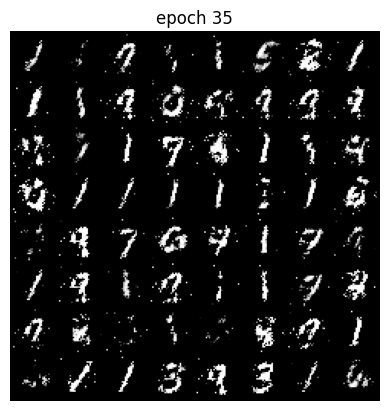

Epoch 35 of 100
Generator loss: 1.75937053, Discriminator loss: 0.39722404


118it [00:30,  3.85it/s]                         


Epoch 36 of 100
Generator loss: 1.71100933, Discriminator loss: 0.40266007


118it [00:30,  3.88it/s]                         


Epoch 37 of 100
Generator loss: 1.67647263, Discriminator loss: 0.41141692


118it [00:30,  3.90it/s]                         


Epoch 38 of 100
Generator loss: 1.66675995, Discriminator loss: 0.41897435


118it [00:31,  3.73it/s]                         


Epoch 39 of 100
Generator loss: 1.60138953, Discriminator loss: 0.43755494


118it [00:31,  3.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


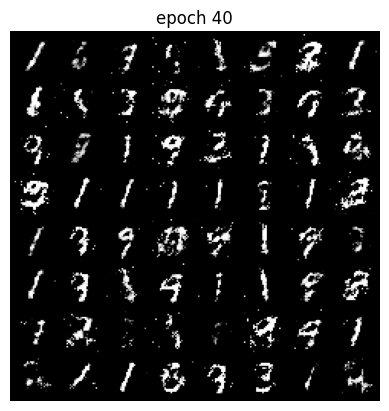

Epoch 40 of 100
Generator loss: 1.60540816, Discriminator loss: 0.42872150


118it [00:30,  3.86it/s]                         


Epoch 41 of 100
Generator loss: 1.62337708, Discriminator loss: 0.43789839


118it [00:31,  3.77it/s]                         


Epoch 42 of 100
Generator loss: 1.52757616, Discriminator loss: 0.45577532


118it [00:30,  3.84it/s]                         


Epoch 43 of 100
Generator loss: 1.55629640, Discriminator loss: 0.45053618


118it [00:31,  3.73it/s]                         


Epoch 44 of 100
Generator loss: 1.52873385, Discriminator loss: 0.45055274


118it [00:31,  3.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


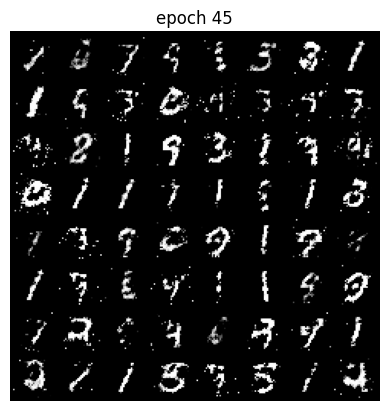

Epoch 45 of 100
Generator loss: 1.48665080, Discriminator loss: 0.46547369


118it [00:31,  3.71it/s]                         


Epoch 46 of 100
Generator loss: 1.47931666, Discriminator loss: 0.47329794


118it [00:31,  3.79it/s]                         


Epoch 47 of 100
Generator loss: 1.45482763, Discriminator loss: 0.47344788


118it [00:31,  3.70it/s]                         


Epoch 48 of 100
Generator loss: 1.42059701, Discriminator loss: 0.48503928


118it [00:31,  3.77it/s]                         


Epoch 49 of 100
Generator loss: 1.40249485, Discriminator loss: 0.49021028


118it [00:31,  3.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


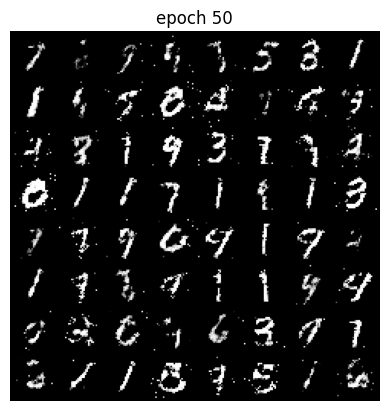

Epoch 50 of 100
Generator loss: 1.42824624, Discriminator loss: 0.49130486


118it [00:30,  3.83it/s]                         


Epoch 51 of 100
Generator loss: 1.37988718, Discriminator loss: 0.50422613


118it [00:30,  3.85it/s]                         


Epoch 52 of 100
Generator loss: 1.37010136, Discriminator loss: 0.50037872


118it [00:30,  3.83it/s]                         


Epoch 53 of 100
Generator loss: 1.39497076, Discriminator loss: 0.49927283


118it [00:30,  3.81it/s]                         


Epoch 54 of 100
Generator loss: 1.34635129, Discriminator loss: 0.51075540


118it [00:30,  3.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


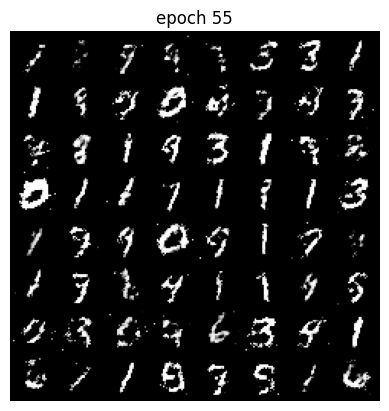

Epoch 55 of 100
Generator loss: 1.33460719, Discriminator loss: 0.51613587


118it [00:34,  3.39it/s]                         


Epoch 56 of 100
Generator loss: 1.32705785, Discriminator loss: 0.51413935


118it [00:31,  3.72it/s]                         


Epoch 57 of 100
Generator loss: 1.32653613, Discriminator loss: 0.51623644


118it [00:31,  3.70it/s]                         


Epoch 58 of 100
Generator loss: 1.32610493, Discriminator loss: 0.52091373


118it [00:30,  3.86it/s]                         


Epoch 59 of 100
Generator loss: 1.34069645, Discriminator loss: 0.51721809


118it [00:30,  3.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


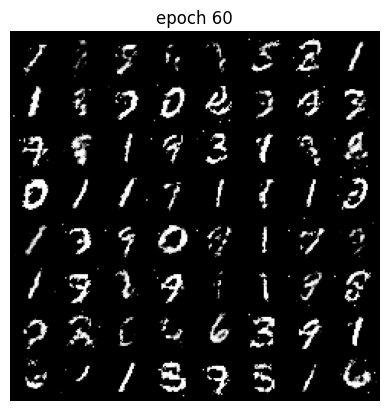

Epoch 60 of 100
Generator loss: 1.30375434, Discriminator loss: 0.52244367


118it [00:32,  3.66it/s]                         


Epoch 61 of 100
Generator loss: 1.30879884, Discriminator loss: 0.52559841


118it [00:31,  3.79it/s]                         


Epoch 62 of 100
Generator loss: 1.29331684, Discriminator loss: 0.52312068


118it [00:31,  3.75it/s]                         


Epoch 63 of 100
Generator loss: 1.30230891, Discriminator loss: 0.52165998


118it [00:30,  3.92it/s]                         


Epoch 64 of 100
Generator loss: 1.27757445, Discriminator loss: 0.53291381


118it [00:30,  3.87it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


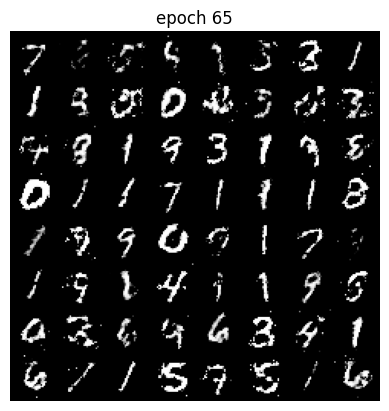

Epoch 65 of 100
Generator loss: 1.27193249, Discriminator loss: 0.52954980


118it [00:30,  3.85it/s]                         


Epoch 66 of 100
Generator loss: 1.27927799, Discriminator loss: 0.53016708


118it [00:31,  3.72it/s]                         


Epoch 67 of 100
Generator loss: 1.29674833, Discriminator loss: 0.52606922


118it [00:30,  3.88it/s]                         


Epoch 68 of 100
Generator loss: 1.27053301, Discriminator loss: 0.52937489


118it [00:31,  3.73it/s]                         


Epoch 69 of 100
Generator loss: 1.26654375, Discriminator loss: 0.53123311


118it [00:31,  3.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


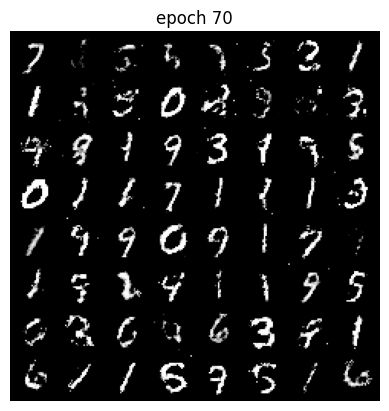

Epoch 70 of 100
Generator loss: 1.26428705, Discriminator loss: 0.53418327


118it [00:32,  3.62it/s]                         


Epoch 71 of 100
Generator loss: 1.27971690, Discriminator loss: 0.53113683


118it [00:32,  3.58it/s]                         


Epoch 72 of 100
Generator loss: 1.26310500, Discriminator loss: 0.53240757


118it [00:31,  3.73it/s]                         


Epoch 73 of 100
Generator loss: 1.26984046, Discriminator loss: 0.53583965


118it [00:31,  3.75it/s]                         


Epoch 74 of 100
Generator loss: 1.25234430, Discriminator loss: 0.53571392


118it [00:31,  3.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


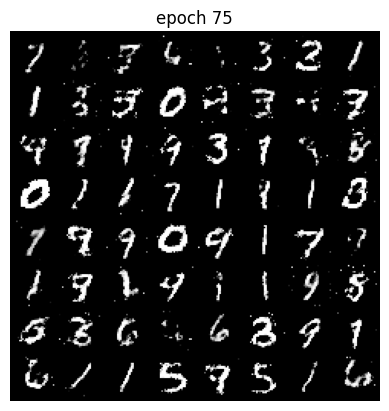

Epoch 75 of 100
Generator loss: 1.25316568, Discriminator loss: 0.53824340


118it [00:30,  3.89it/s]                         


Epoch 76 of 100
Generator loss: 1.26295107, Discriminator loss: 0.53690499


118it [00:31,  3.73it/s]                         


Epoch 77 of 100
Generator loss: 1.26416580, Discriminator loss: 0.53666945


118it [00:30,  3.91it/s]                         


Epoch 78 of 100
Generator loss: 1.25216509, Discriminator loss: 0.53732460


118it [00:30,  3.91it/s]                         


Epoch 79 of 100
Generator loss: 1.24899097, Discriminator loss: 0.53945323


118it [00:31,  3.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


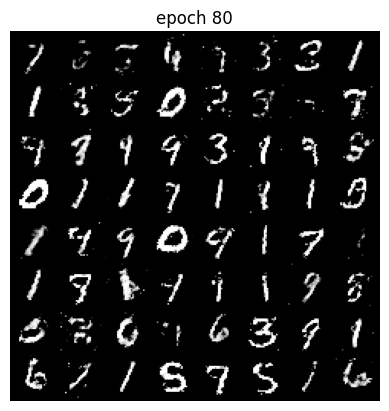

Epoch 80 of 100
Generator loss: 1.22726455, Discriminator loss: 0.54424605


118it [00:31,  3.79it/s]                         


Epoch 81 of 100
Generator loss: 1.25569847, Discriminator loss: 0.54188301


118it [00:30,  3.89it/s]                         


Epoch 82 of 100
Generator loss: 1.25658482, Discriminator loss: 0.53879969


118it [00:30,  3.90it/s]                         


Epoch 83 of 100
Generator loss: 1.23729369, Discriminator loss: 0.54409188


118it [00:31,  3.74it/s]                         


Epoch 84 of 100
Generator loss: 1.22457907, Discriminator loss: 0.54933210


118it [00:31,  3.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


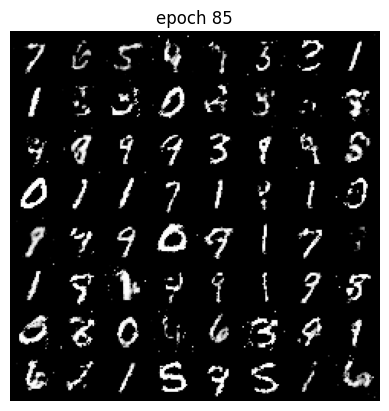

Epoch 85 of 100
Generator loss: 1.22996235, Discriminator loss: 0.54473918


118it [00:31,  3.75it/s]                         


Epoch 86 of 100
Generator loss: 1.22910661, Discriminator loss: 0.54967084


118it [00:30,  3.84it/s]                         


Epoch 87 of 100
Generator loss: 1.21944393, Discriminator loss: 0.54722305


118it [00:31,  3.71it/s]                         


Epoch 88 of 100
Generator loss: 1.21359332, Discriminator loss: 0.55139308


118it [00:31,  3.79it/s]                         


Epoch 89 of 100
Generator loss: 1.21277259, Discriminator loss: 0.54979212


118it [00:31,  3.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


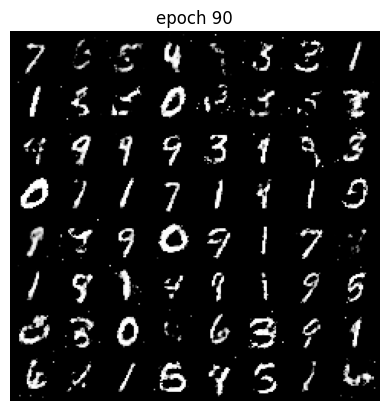

Epoch 90 of 100
Generator loss: 1.21088378, Discriminator loss: 0.55123430


118it [00:30,  3.92it/s]                         


Epoch 91 of 100
Generator loss: 1.22797186, Discriminator loss: 0.54940616


118it [00:30,  3.86it/s]                         


Epoch 92 of 100
Generator loss: 1.21883856, Discriminator loss: 0.55675100


118it [00:30,  3.85it/s]                         


Epoch 93 of 100
Generator loss: 1.19667258, Discriminator loss: 0.55290861


118it [00:31,  3.79it/s]                         


Epoch 94 of 100
Generator loss: 1.21028003, Discriminator loss: 0.55219018


118it [00:30,  3.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


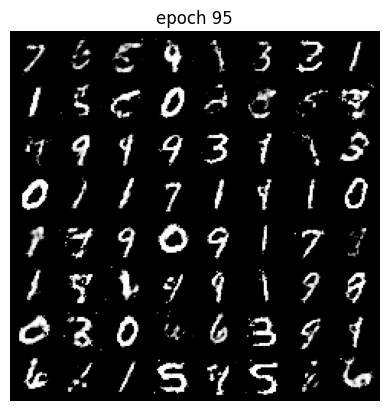

Epoch 95 of 100
Generator loss: 1.19625542, Discriminator loss: 0.55891268


118it [00:31,  3.72it/s]                         


Epoch 96 of 100
Generator loss: 1.20287998, Discriminator loss: 0.55818328


118it [00:31,  3.77it/s]                         


Epoch 97 of 100
Generator loss: 1.20081853, Discriminator loss: 0.55797982


118it [00:31,  3.78it/s]                         


Epoch 98 of 100
Generator loss: 1.18532718, Discriminator loss: 0.56023493


118it [00:31,  3.77it/s]                         


Epoch 99 of 100
Generator loss: 1.19298399, Discriminator loss: 0.55614136


118it [00:32,  3.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


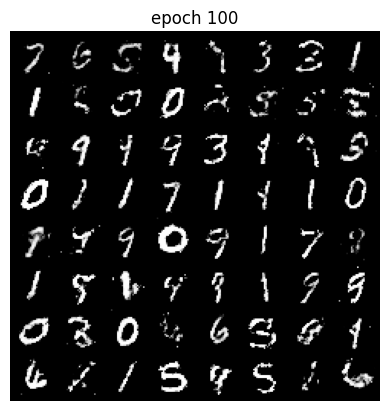

Epoch 100 of 100
Generator loss: 1.19543273, Discriminator loss: 0.55751588
DONE TRAINING


100

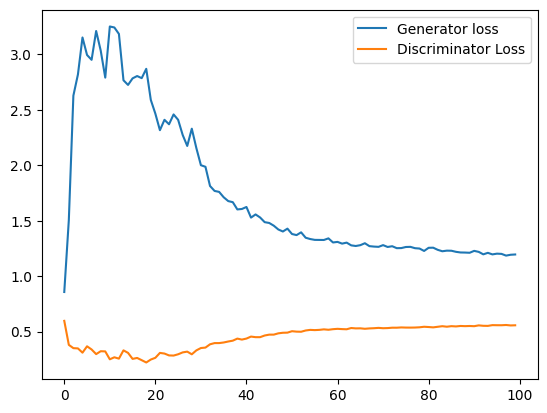

In [9]:
torch.manual_seed(7777)
sigma = 0
grad_descent = False
def generator_loss(output, descent=False):
    ############ YOUR CODE HERE ##########
    # Generator tries to make the discriminator output 1 for fake images if using gradient ascent 
    # Generator tries to make the drisciminator output 0 for gradient descent 
    if descent:
        # When using gradient descent, minimize log(1 - D(G(z)))
        # This approach penalizes the generator more as it improves
        #labels = torch.zeros_like(output, device=output.device)
        #loss = criterion(output, labels)
        loss = torch.mean(torch.log(1 - output))
        return loss  
    else:
        # Traditional approach: maximize log(D(G(z)))
        # The generator tries to make the discriminator output 1 for fake images
        labels = torch.ones_like(output, device=output.device)
        return criterion(output, labels)

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    # Discriminator tries to correctly classify real and fake images
    return criterion(output, true_label)
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        # Train Discriminator
        # Real Images
        real_images = data[0].to(device)
        real_noisy_images = add_gaussian_noise(real_images, std=sigma/(epoch+1))

        labels_real = torch.ones(len(real_noisy_images), 1, device=device)
        outputs_real = discriminator.forward(real_noisy_images)
        loss_d_real = discriminator_loss(outputs_real, labels_real)
        
        # Fake Images
        # noise_batch = torch.randn(batch_size, nz, 1, 1, device=device)
        noise_batch = torch.randn(batch_size, nz).to(device)
        fake_images = generator.forward(noise_batch)
        labels_fake = torch.zeros(batch_size, 1, device=device)
        outputs_fake = discriminator.forward(fake_images.detach())
        loss_d_fake = discriminator_loss(outputs_fake, labels_fake)

        # Combine losses and update discriminator
        loss_d_total = (loss_d_real + loss_d_fake)/2
        optim_d.zero_grad()
        loss_d_total.backward()
        optim_d.step()

        # Train Generator
        noise_batch = torch.randn(batch_size, nz).to(device)
        fake_images = generator.forward(noise_batch)
        outputs_fake = discriminator.forward(fake_images) # comment out? 
        # loss_g = generator_loss(outputs_fake) # gradient ascent 
        loss_g_total = generator_loss(outputs_fake, descent=grad_descent) # gradient descent
        optim_g.zero_grad()
        loss_g_total.backward()
        optim_g.step()

        # Update running loss totals
        loss_g += loss_g_total.item()
        loss_d += loss_d_total.item()

        ######################################
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch == 0):
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_improved/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

    
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_improved/generator.pth')
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_improved/generator_images.gif', imgs)
# plot and save the generator and discriminator loss
def convert_to_floats(lst):
    float_list = []
    for item in lst:
        # Check if the item is a tensor
        if torch.is_tensor(item):
            # Convert tensor to a Python float
            float_list.append(item.item())
        else:
            # Convert to float if it's not a tensor
            float_list.append(float(item))
    return float_list

losses_d = convert_to_floats(losses_d)
losses_g = convert_to_floats(losses_g)

plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs_improved/loss.png')
len(losses_d)